C:\Users\UAI5FE\OneDrive - Bosch Group\00_DHBW\git\T3M40507_Maschinelles_Lernen_und_Computational Intelligence


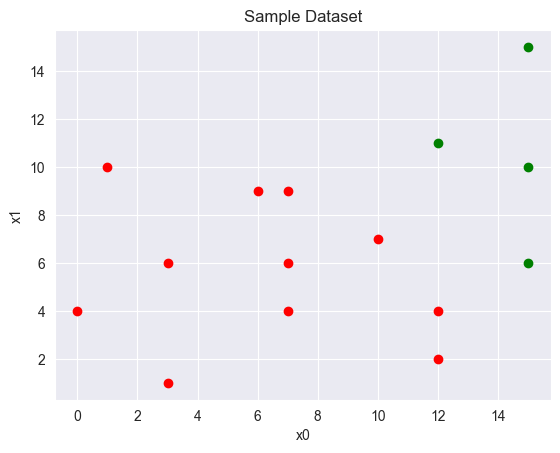

In [7]:
# Introduction to Neural Networks with Sklearn

# Prof. Dr. Dirk Reichardt - DHBW

# this time we use libraries - (much faster!)


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from math import exp
from random import random

# Read Sample Training Data 

trainingData = 'perceptron_testdata_02.csv'

print(os.getcwd() )

#os.chdir('/Users/dirkreichardt/Downloads/')  # put your own path here ...

data = pd.read_csv(trainingData, sep=";")    


# and visualize it ...

pos = (data["class"] == 1)
positives = data[pos]
positives = np.array(positives)

neg = (data["class"] == 0)
negatives = data[neg]
negatives = np.array(negatives)

plt.scatter(positives[:,0],positives[:,1], color = 'green')
plt.scatter(negatives[:,0],negatives[:,1], color = 'red')

plt.title('Sample Dataset')
plt.xlabel('x0')
plt.ylabel('x1')

plt.show()



In [8]:
# Simple Neural Network is called "multi layer perceptron" (MLP) ... let's import this

from sklearn.neural_network import MLPClassifier

# preparing the data 

# first step before we start: preparing the data

examples = len(data)
x = np.array(pd.read_csv(trainingData, sep=";", usecols = ['x','y']))

t = np.array(data["class"])


minx0 = x[:,0].min()-1
minx1 = x[:,1].min()-1

maxx0 = x[:,0].max()+1
maxx1 = x[:,1].max()+1

# normalize to a range between -1,1
    
x = x.astype(float)

x[:,0] = (x[:,0]/maxx0-0.5)*2.0
x[:,1] = (x[:,1]/maxx1-0.5)*2.0
print(x)
# now let's train the classifier

nn = MLPClassifier(activation = 'logistic', 
                   learning_rate = 'constant', 
                   learning_rate_init = 0.16, 
                   hidden_layer_sizes = (5,), 
                   max_iter=3000).fit(x, t)

[[-0.25   0.125]
 [ 0.5    0.375]
 [ 0.5   -0.5  ]
 [ 0.875  0.25 ]
 [-0.125 -0.5  ]
 [-0.125  0.125]
 [-0.625 -0.875]
 [ 0.5   -0.75 ]
 [ 0.875  0.875]
 [-0.125 -0.25 ]
 [ 0.875 -0.25 ]
 [-0.875  0.25 ]
 [ 0.25  -0.125]
 [-0.625 -0.25 ]
 [-1.    -0.5  ]]


In [9]:
# the network is trained and we can use it

print(nn.predict(x))  # testing with the training data
print(t)              # the training data results for comparison

nn.score(x,t)         # the accuracy value for the learning result


[0 1 0 1 0 0 0 0 1 0 1 0 0 0 0]
[0 1 0 1 0 0 0 0 1 0 1 0 0 0 0]


1.0